# 10. Drop out과 Batch Normalization 적용해 보기
* Drop out : Overfitting 해결 위해
* Batch Normalization : vanishing/exploding gradient 문제 해결 위해(layer 수가 많아지면 많아질수록 누적되어 발생)

hyper parameter 설정

In [1]:
batch_size = 10
num_classes = 3
epochs = 200

라이브러리 및 함수 설정

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers

import matplotlib.pyplot as plt
def hist_view(hist):
  print('## training loss and acc ##')
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='center')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='center right')

  plt.show()

데이터 로드

In [3]:
# from sklearn import datasets
# iris = datasets.load_iris()
# x=iris.data
import pandas as pd
![ ! -f  iris0.csv ]&&wget http://j.finfra.com/_file/iris0.csv
iris=pd.read_csv("iris0.csv")



--2023-08-01 07:42:36--  http://j.finfra.com/_file/iris0.csv
Resolving j.finfra.com (j.finfra.com)... 211.252.85.187
Connecting to j.finfra.com (j.finfra.com)|211.252.85.187|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3730 (3.6K) [text/csv]
Saving to: ‘iris0.csv’

iris0.csv           100%[===================>]   3.64K  --.-KB/s    in 0s      

2023-08-01 07:42:37 (419 MB/s) - ‘iris0.csv’ saved [3730/3730]



input data 와 target data 설정

In [4]:
x=iris.iloc[:,0:4].values
y_text=iris.iloc[:,4:5]

sets=y_text.drop_duplicates()["Species"].tolist()
encoder={k:v for v,k in enumerate(sets)}
y_num=[ encoder[i] for i in y_text["Species"].tolist() ]




train data 와 test data 나눠주기

In [5]:
# iris.target → y
y= keras.utils.to_categorical(y_num, num_classes)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((105, 4), (45, 4), (105, 3), (45, 3))

## Model 에 Dropout & BatchNormalization 적용하기
- Dropout<br>
해당 layer의 weight 의 업데이트를 막아준다.
- BatchNormalization<br>
weight 값들을 Normalization 해주어서 다른 곳으로 튀어나가는 것을 막아줌.

In [6]:
from keras.layers import BatchNormalization, Dropout

model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))

model.add(Dense(4, activation='relu'))

model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 batch_normalization (BatchN  (None, 4)                16        
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                        

In [7]:
adam=optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


훈련하기

In [8]:
# batch_size,epochs
hist=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))



결과 확인

## training loss and acc ##


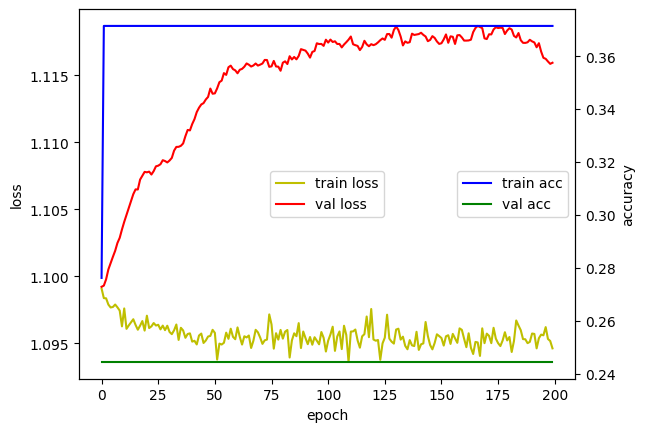

Test loss: 1.1159307956695557
Test accuracy: 0.24444444477558136


In [9]:
hist_view(hist)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [10]:
decoder = {k:v for k,v in enumerate( sets )}
decoder

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [11]:
r=np.argmax(model.predict(x_test[:10,:]), axis=-1)
[decoder[i] for i in r]

1/1 [==============================] - 0s 135ms/step


['virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica']

# Overfitting을 줄이기 위한 또 다른 방법은? Regularization!